In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df= pd.read_csv("C:\Users\Ayoube.bakhouch\Downloads\grafana_data_export.csv" ,sep=';')
df.columns=['series','timestamp','value']
del df['series']
# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df.index=df.timestamp
df['origine time']=df.index
del df['timestamp']
del df.index.name


C:\Users\Ayoube.bakhouch\Anaconda\envs\ipykernel_py2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


IOError: File C:\Users\Ayoube.bakhouch\Downloads\grafana_data_export.csv does not exist

In [ ]:
#decompose by days 
a=df.loc[df['DayOfTheWeek'] == 3]
#creat a daterange to stock mondays
time=pd.date_range(start='1/1/2018', end='1/13/2018 23:50:00', freq='10min')
a.index=time
a=a.fillna(0)

In [ ]:
decomposition=sm.tsa.seasonal_decompose(a['value'],model='additive',freq=24*60/10)
fig=decomposition.plot()
plt.show()

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import library.dataset as dataset
import library.stats.atlas as atlas
# iPython-specific
import IPython

# standard libs
import pandas as pd
from pprint import pprint
from datetime import datetime, timedelta
from influxdb import DataFrameClient
import collections
import numpy as np
import math
# custom libs
import library.date_manipulation as date_manipulation
import library.stats.atlas as atlas
import library.stats.variation as stats_variation
import library.influx.query as influx_query

# dataset import
import library.dataset as dataset

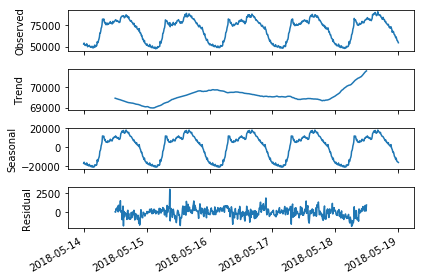

In [12]:
#for a week from monday to saturday
from statsmodels.tsa.seasonal import seasonal_decompose

boundary_from = '2018-05-14'
boundary_to = '2018-05-19'
df_dict=dataset.get_data_from_prod_interval_low_precision_sum_count_service_mno(boundary_from ,boundary_to, 'timer_request_by_business')
for i in df_dict.values():
    if len(i)==720:
        #decomposition=sm.tsa.seasonal_decompose(i,model='additive',freq=24*60/10)
        decomposition=seasonal_decompose(i,model='additive',freq=24*60/10)
        fig=decomposition.plot()
        plt.show()

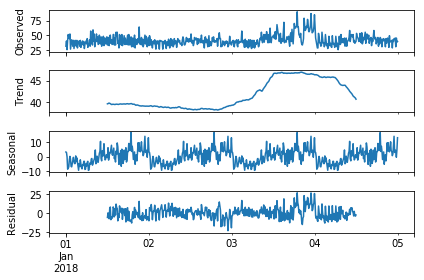

In [13]:
####for a month and selecting by day 
boundary_from = '2018-04-30'
boundary_to = '2018-05-28'
df_dict = dataset.get_data_from_prod_interval_low_precision(boundary_from,boundary_to,"timer_request_by_business", )
df=df_dict.values()[55]
df.index = pd.to_datetime(df.index)
df['timestamp'] = pd.to_datetime(df.index)
df['DayOfTheWeek'] = df.timestamp.dt.dayofweek
mon=df.loc[df['DayOfTheWeek'] == 0]
time=pd.date_range(start='1/1/2018', end='1/4/2018 23:50:00', freq='10min')
mon.index=time
decomposition=sm.tsa.seasonal_decompose(mon['count'],model='additive',freq=24*60/10)
fig=decomposition.plot()
plt.show()

In [5]:
for i in df_dict.values():
    print(len(i))
    if len(i)==720:
        decomposition=sm.tsa.seasonal_decompose(i,model='additive',freq=24*60/10)
        fig=decomposition.plot()
        plt.show()

9504
